# Titanic
## Predict survival on the Titanic using Gradient Boost


# Load data into Pandas DataFrame

In [26]:
import pandas as pd

# Read into DataFrames
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

# At first lets check the train DataFrame
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check for `null` values

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Null values found in `Age: 177`, `Cabin: 687`, `Embarked: 2`

# Check data types

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check distribution of `Age` before imputing null values

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


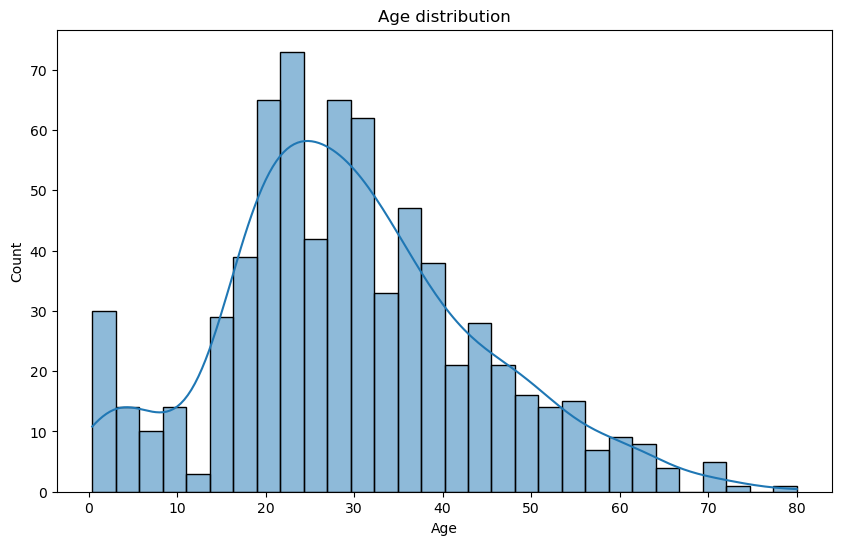

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram with Age variable
plt.figure(figsize=(10,6))
sns.histplot(train["Age"], bins=30, kde=True)
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Impute null values of `Age` where distribution is right-skewed

### When we get right-skewed distribution of a numerical variable the better practice is use `median` value for imputing missing values. We can't use `mean` value because it will not represent the central tendency of the distribution, because the mean value will come from the right area of distribution.
### But for the first time I will use PMM (Predictive Mean Matching) to impute those values because this technique especially good for non-normally distributed  or skewed data.

In [30]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64